In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df.duplicated().sum()

1

In [13]:
df = df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

C:\Users\thask\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


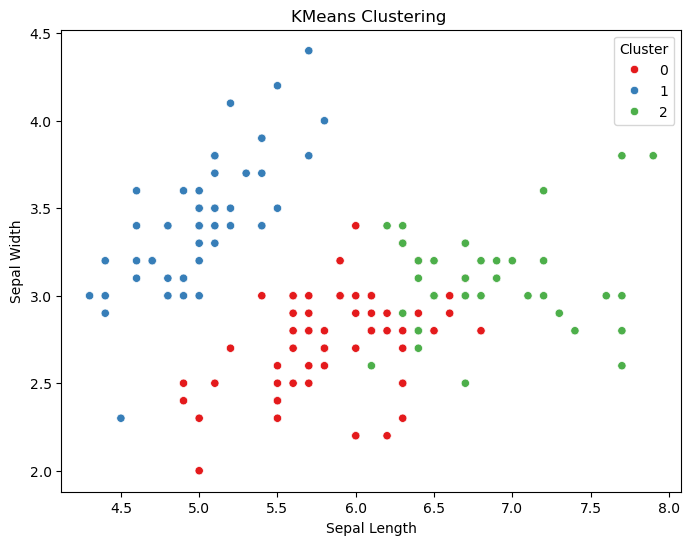

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(df)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=iris.feature_names[0], y=iris.feature_names[1], hue='kmeans_cluster', palette='Set1')
plt.title("KMeans Clustering ")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Cluster')
plt.show()

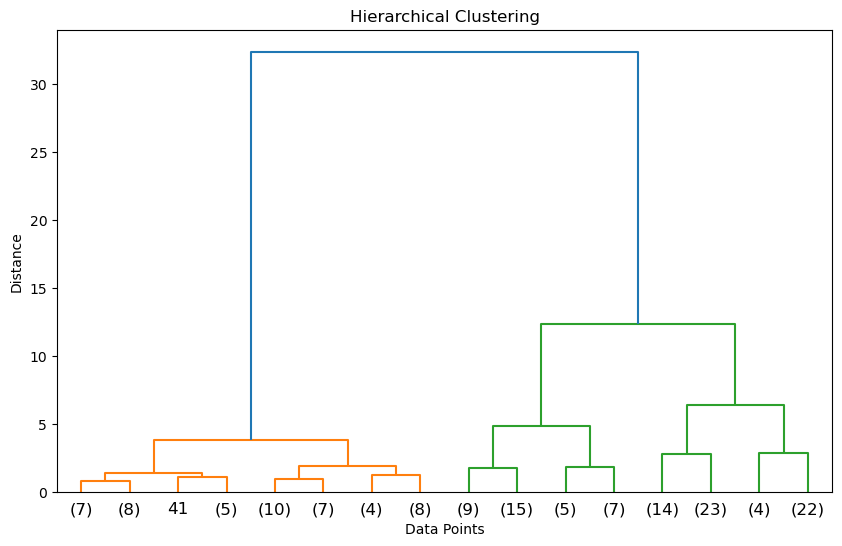

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


linkage_matrix = linkage(df.drop('kmeans_cluster', axis=1), method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title("Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

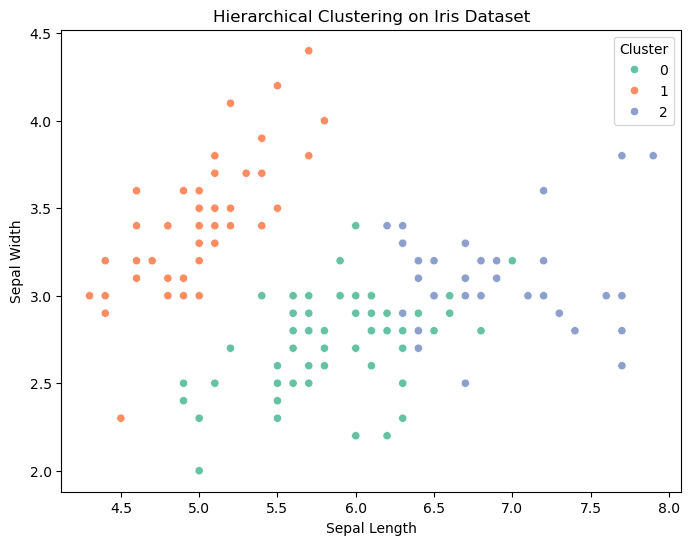

In [25]:
# Apply Agglomerative Clustering 
agg = AgglomerativeClustering(n_clusters=3)
df['hierarchical_cluster'] = agg.fit_predict(df.drop(['kmeans_cluster'], axis=1))


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=iris.feature_names[0], y=iris.feature_names[1], hue='hierarchical_cluster', palette='Set2')
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Cluster')
plt.show()